In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from numba import jit
from scipy.integrate import odeint
from time import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Just-in-time compiling these two functions
# seems to gain about a factor 2 in speed.
# (Note that the first time the function is called,
# it is slower, since compilation takes place.)
# (Note also that you should never define and use
# a just-in-time compiled function in the same cell
# in a notebook, as it will be compiled every time)

@jit
def lorenz(x, sigma, rho, beta):
    # The Lorenz system (see Ch. 9 in Strogatz)
    xdot = sigma*(x[1] - x[0])
    ydot = x[0]*(rho - x[2]) - x[1]
    zdot = x[0]*x[1] - beta*x[2]
    return np.array([xdot, ydot, zdot])

@jit
def f(x, t):
    # Wrapper function for the lorenz equations
    sigma = 10.0
    rho   = 28.0
    beta  = 8/3
    return lorenz(x, sigma, rho, beta)

In [7]:
# Calculating the fractal dimension of the Lorenz attractor

# Run trajectory for a time t = 50,
# to make sure we are 'on' the attractor:
X0 = odeint(f, [1, 1, 1], 50)

# Calculate N points on the attractor
N  = 1000000
T  = 2000
Ts = np.linspace(0, T, N)
X  = odeint(f, x0, Ts)

In [66]:
# Select one of the points at random,
# then calculate the distance to all other points
r = int(np.random.random()*N)
x = X[r,:]
d = np.sqrt(np.sum((X - x)**2, axis = 1))

(0.1, 10000000.0)

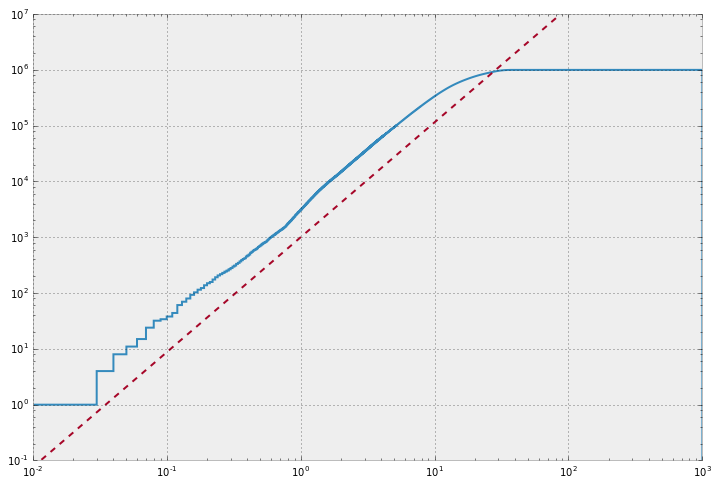

In [67]:
fig = plt.figure(figsize = (12, 8))
n, bins, patches = plt.hist(d, bins = np.linspace(0, 1000, 100000), histtype='step', cumulative=True, lw = 2)

x = np.linspace(0, 1000, 100000)
plt.plot(x, 1e3*x**2.06, '--', lw = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2, 1e3)
plt.ylim(1e-1, 1e7)

In [47]:
epsilons = np.logspace(-2, 2, 1000)
lt = np.zeros(epsilons.size-1)

for i in range(100):
    # Select one of the points at random,
    # then calculate the distance to all other points
    r = int(np.random.random()*N)
    x = X[r,:]
    d = np.sqrt(np.sum((X - x)**2, axis = 1))
    n, b = np.histogram(d, bins = epsilons)
    lt += np.cumsum(n)

(0.1, 1000000000.0)

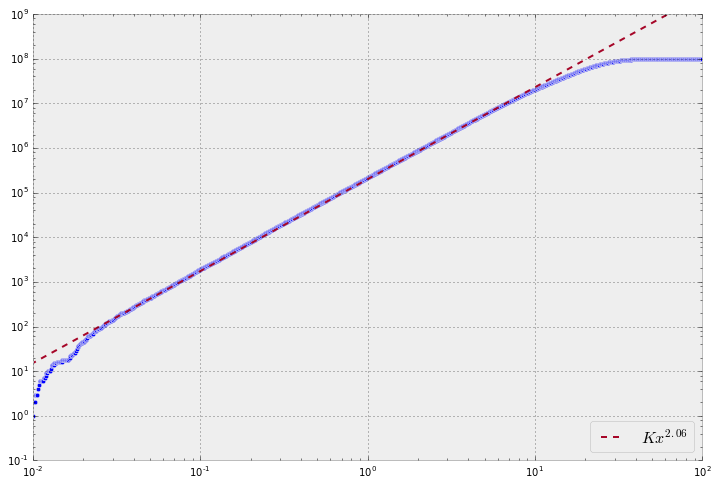

In [65]:
fig = plt.figure(figsize = (12,8))
plt.scatter(epsilons[1:], lt)
x = np.linspace(1e-3, 1000, 100000)
plt.plot(x, 2e5*x**2.06, '--', lw = 2, c = '#A60628', label = '$K x^{2.06}$')
plt.legend(loc = 'lower right', prop={'size':16})

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2, 1e2)
plt.ylim(1e-1, 1e9)

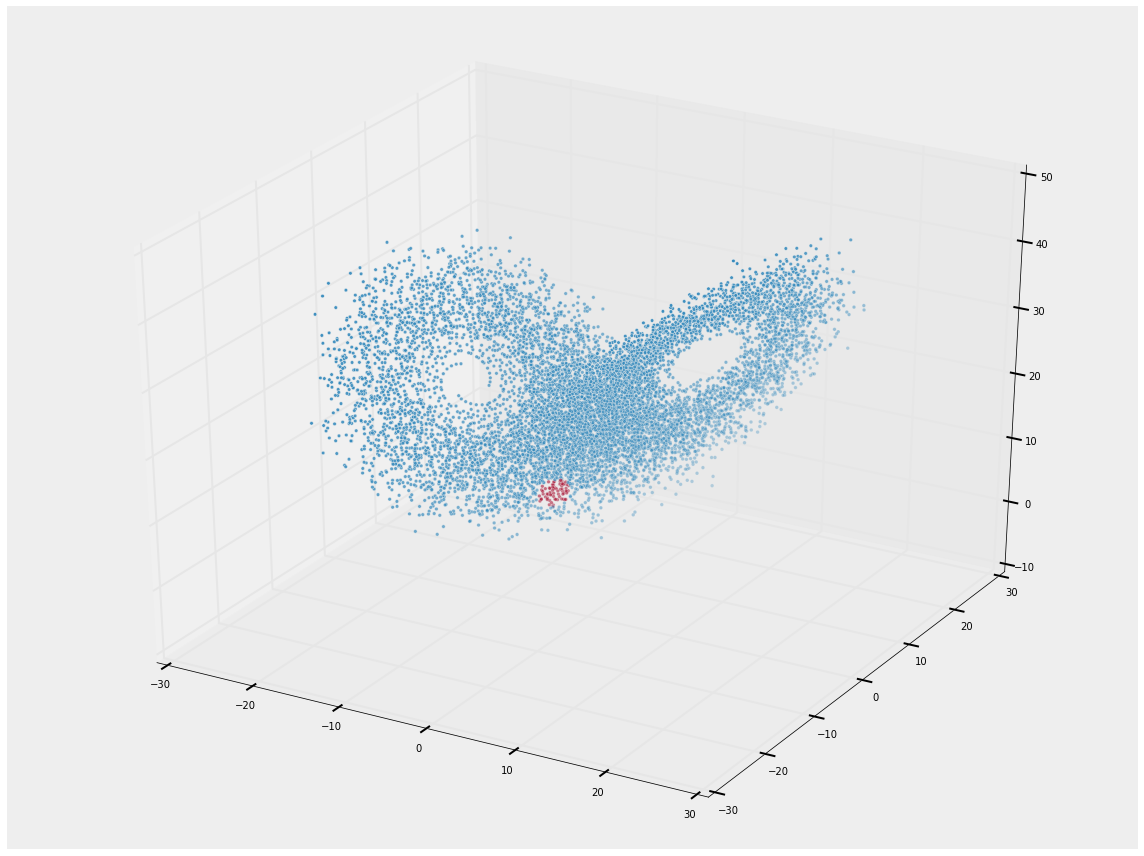

In [84]:
# Illustration

# Create a smaller set of points,
# as it takes forever to scatter-plot 1 million points
# Calculating the fractal dimension of the Lorenz attractor

# Run trajectory for a time t = 50,
# to make sure we are 'on' the attractor:
X0 = odeint(f, [1, 1, 1], 50)

# Calculate N points on the attractor
N  = 10000
T  = 2000
Ts = np.linspace(0, T, N)
X  = odeint(f, x0, Ts)

# Select one of the points at random,
# then calculate the distance to all other points
r = int(np.random.random()*N)
x = X[r,:]
d = np.sqrt(np.sum((X - x)**2, axis = 1))

# Create figure with 3d axes
fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111, projection='3d')

# Choose a different color for those points
# that are within a distance epsilon of x
epsilon = 2
c = np.where(d < epsilon, '#A60628', '#348ABD', )
ax.scatter(X[:,0], X[:,1], X[:,2], marker = '.', s = 50, c = c)
plt.tight_layout()

'#A60628'

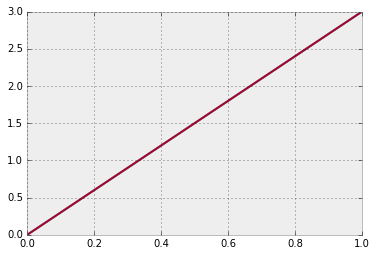

In [72]:
l, = plt.plot([0,1], [0,3])
l.get_color()
l, = plt.plot([0,1], [0,3])
l.get_color()